In [195]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data']
y = iris['target']

n_samples, n_features = X.shape

print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 150
Number of features: 4


C:\Users\Asus\anaconda\lib\site-packages\sklearn\datasets\base.py:242: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
C:\Users\Asus\anaconda\lib\site-packages\sklearn\datasets\base.py:246: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, chec

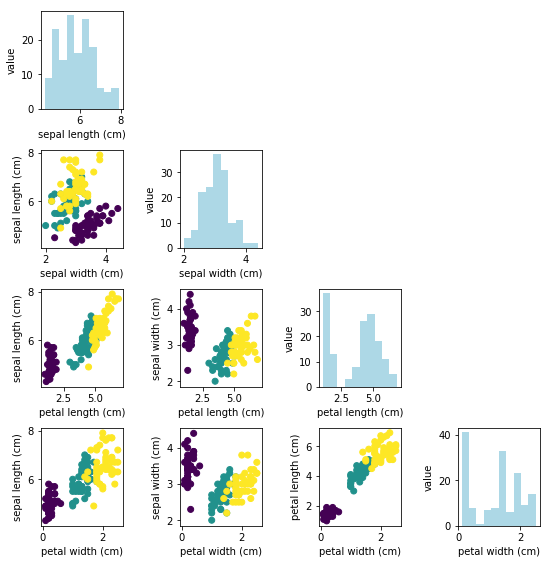

In [196]:
fig, axes = plt.subplots(nrows = n_features, ncols = n_features , figsize=(8,8))
fig.tight_layout(pad=2)

names = iris.feature_names

for i,j in zip(*np.tril_indices_from(axes,k=-1)):
    
    axes[i,j].scatter(X[:,i],X[:,j],c=y)
    
    axes[i,j].set_xlabel(names[i])
    axes[i,j].set_ylabel(names[j])
    axes[j,i].set_axis_off()
    

for i in range(len(names)):
    
    axes[i,i].hist(X[:,i],color = 'lightblue')
    
    axes[i,i].set_xlabel(names[i])
    axes[i,i].set_ylabel('value')


# mean, std and covariance matrix

In [197]:
def mean(X):
    return sum(X)/len(X)

In [198]:
def std(X):
    
    m = mean(X)
    
    s = (sum((r-m)**2 for r in X)/(len(X)))
    
    ans = s ** 0.5

    
    return ans
    

In [202]:
def standard(X):

    return (X-mean(X))/std(X)

In [203]:
def cov(X):
    
    return (X.T @ X)/(X.shape[0]-1)

In [205]:
X_s = standard(X)

In [212]:
covariance_matrix = cov(X_s)

In [213]:
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

# singular values

In [214]:
from numpy.linalg import eig

In [245]:
eig_val , eig_vecs = eig(covariance_matrix)

In [246]:
eig_val

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [259]:
eig_vecs

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [262]:
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)


signs = np.sign(eig_vecs[max_abs_idx,range(eig_vecs.shape[0])])

In [269]:
eig_vecs = eig_vecs*signs[np.newaxis,:]

In [270]:
eig_vecs = eig_vecs.T

In [271]:
eig_vecs

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [ 0.71956635, -0.24438178, -0.14212637, -0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [272]:
eig_pairs = [(np.abs(eig_val[i]),eig_vecs[i,:]) for i in range(len(eig_val))]

In [273]:
eig_pairs

[(2.9380850501999918,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.920164904162487, array([0.37741762, 0.92329566, 0.02449161, 0.06694199])),
 (0.14774182104494785,
  array([ 0.71956635, -0.24438178, -0.14212637, -0.63427274])),
 (0.020853862176462023,
  array([-0.26128628,  0.12350962,  0.80144925, -0.52359713]))]

In [277]:
eig_pairs.sort(key= lambda x:x[0],reverse= True)

In [310]:
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

In [311]:
total_var = sum(eig_val)

In [312]:
explained_var = [(i/total_var)*100 for i in eig_vals_sorted]

In [313]:
explained_var = np.round(explained_var,2)

In [314]:
explained_var

array([72.96, 22.85,  3.67,  0.52])

# scree plot

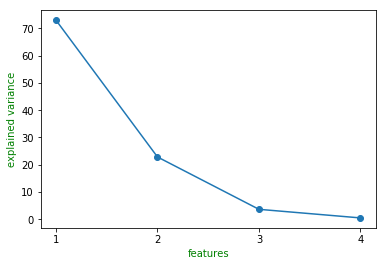

In [315]:
plt.plot(np.arange(n_features)+1,explained_var,'o-')
plt.xticks(np.arange(1,n_features+1))
plt.xlabel("features",color="green")
plt.ylabel('explained variance',color= 'green')
plt.show()

In [318]:
pcs = eig_vecs_sorted[0:2, :]

In [320]:
projection = pcs.T

In [321]:
projection


array([[ 0.52106591,  0.37741762],
       [-0.26934744,  0.92329566],
       [ 0.5804131 ,  0.02449161],
       [ 0.56485654,  0.06694199]])

# data projected

In [322]:
pca = X_s.dot(projection)

In [324]:
pca.shape

(150, 2)

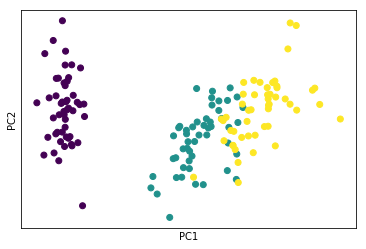

In [326]:
plt.scatter(pca[:, 0], pca[:, 1], c = y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.show()